# Data Cleaning and Exploratory Data Analysis for Twitter UK Dataset

**By Esraa Mohamed**

<img src="https://i.imgur.com/T3yNl4K.png">

Let us install the needed library 

In [240]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [241]:
!pip install plotly

In [242]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [243]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [244]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


##############################################

First of all import all the required libraries and the dataset:

In [245]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import neattext.functions as nfx

import re

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords

# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer


#wordcloud 
from wordcloud import WordCloud 
import plotly.express as px

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

import nltk
nltk.download('wordnet')
nltk.download('punkt')
  


#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then we read the dataset from our saved CSV files. 

In [246]:
data = pd.read_csv('uk-09122021-tweets.csv')

###################################################

## 1. Clean Twitter dataset

Let us view the dataset first and then start cleaning the data.

In [247]:
data.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,0,0
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,0,0
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,0,0
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,0,0
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,0,0


Number of data used in the study 12,200 (12k)

In [248]:
data.shape

(12265, 12)

Get basic statistics about the dataset for the study 

In [249]:
data.describe()

,author_id,author_followers,author_tweets,retweets,replies,likes,quote_count
count,1.226500e+04,12265.000000,1.226500e+04,12265.000000,12265.000000,12265.000000,12265.000000
mean,2.149834e+17,2351.508357,3.100014e+04,0.862210,0.827803,5.680636,0.136894
std,4.365468e+17,7562.774624,7.551147e+04,11.677329,5.430807,50.152652,2.387234
min,1.165800e+04,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9.590464e+07,265.000000,3.326000e+03,0.000000,0.000000,0.000000,0.000000
50%,4.130570e+08,688.000000,1.167700e+04,0.000000,0.000000,1.000000,0.000000
75%,3.005828e+09,1863.000000,3.492600e+04,0.000000,1.000000,3.000000,0.000000
max,1.465043e+18,230021.000000,1.781084e+06,1052.000000,383.000000,3206.000000,140.000000


Get information about the data

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_id           12265 non-null  int64 
 1   username            12265 non-null  object
 2   author_followers    12265 non-null  int64 
 3   author_tweets       12265 non-null  int64 
 4   author_description  11243 non-null  object
 5   author_location     10898 non-null  object
 6   text                12265 non-null  object
 7   created_at          12265 non-null  object
 8   retweets            12265 non-null  int64 
 9   replies             12265 non-null  int64 
 10  likes               12265 non-null  int64 
 11  quote_count         12265 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1.1+ MB


In [251]:
# check if their are any nan values
data.isna().sum()

author_id                0
username                 0
author_followers         0
author_tweets            0
author_description    1022
author_location       1367
text                     0
created_at               0
retweets                 0
replies                  0
likes                    0
quote_count              0
dtype: int64

In [252]:
uk_data_df = data.copy()

In [253]:
# fill the nan values with the text "no_location"
uk_data_df['author_location'] = uk_data_df['author_location'].fillna('no_location')

In [254]:
# recheck if thier any nan in our data
uk_data_df['author_location'].isna().sum()

0

In [255]:
# fill the nan with the text "no_description"
uk_data_df['author_description'] = uk_data_df['author_description'].fillna('no_description')

In [256]:
# recheck if thier any nan in our data
uk_data_df['author_description'].isna().sum()

0

In [257]:
uk_data_df.isna().sum()

author_id             0
username              0
author_followers      0
author_tweets         0
author_description    0
author_location       0
text                  0
created_at            0
retweets              0
replies               0
likes                 0
quote_count           0
dtype: int64

In [258]:
# number of data collected 12 columns and they are as follow
uk_data_df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count'],
      dtype='object')

In [259]:
uk_data_df['username'].unique()

array(['DaveWithington1', 'x3ChelseaLouise', 'alfaqfour', ...,
       'bethofnight', 'Kerry0301', '4thStafford'], dtype=object)

In [260]:
# number of collected users
uk_data_df['username'].nunique()

8171

In [261]:
# number of location used in the study in UK
uk_data_df['author_location'].nunique()

3716

In [262]:
# Location in the UK used in the study
uk_locations_ls = uk_data_df['author_location'].unique().tolist()
uk_locations_ls

['Stoke-on-Trent',
 'South Yorkshire ',
 'Essex ',
 'Stopsley Luton',
 'Scotland',
 'iPhone: 52.219701,-1.865818',
 'Hull, England',
 'Plympton, England',
 'London, England',
 'scotland',
 'South West, England',
 'Gourock Scotland',
 'North West, England',
 'no_location',
 'Whitstable Kent',
 'Great Britain',
 'Middlesbrough, England',
 'England',
 'Southampton England ',
 'stonehaven',
 'Isle Of Wight',
 'Wirral',
 'swansea',
 'bridlington',
 'Manchester, England',
 'Kent',
 'Stoke-on-Trent, England',
 'Essex & Manchester',
 'Málaga | UK | Worldwide',
 'The Shire of Hertford',
 '🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f Rhydamman',
 'Sheffield, UK',
 'Leeds  LS7 1AB ~ 0113 2436791',
 'SW1',
 'North East, England',
 'United Kingdom',
 'Widnes, England',
 'Cardiff, 🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f',
 'York, England',
 'Tewkesbury, England',
 'Hemel Hempstead ',
 'UK',
 'Worldwide',
 'Belfast, Ireland',
 'Wales, United Kingdom',
 'Here and

In [263]:
len(uk_locations_ls)

3716

In [264]:
uk_data_df['author_followers'].unique()

array([5235,  279, 4336, ..., 5486, 6159, 7715])

In [265]:
# check if we have any duplicated rows in the dataset
uk_data_df[uk_data_df.duplicated(keep=False)].sum()

author_id             0.0
username              0.0
author_followers      0.0
author_tweets         0.0
author_description    0.0
author_location       0.0
text                  0.0
created_at            0.0
retweets              0.0
replies               0.0
likes                 0.0
quote_count           0.0
dtype: float64

### Helper functions to clean the tweets

In [266]:
#initializing Lemmatizer and stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

In [267]:
# define a function to clean the tweet.
def clean_tweet(tweet):
    '''
    tweet: String
           Input Data
    tweet: String
           Output Data
           
    func: Convert tweet to lower case
          Replace URLs with a space in the message
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace  usernames with space. The usernames are any word that starts with @.
          Replace everything not a letter or apostrophe with space
          Remove single letter words
          lemmatize, tokenize (nouns and verb), remove stop words, filter all the non-alphabetic words, then join
          them again

    '''
    
    tweet = tweet.lower()
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('@', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    
    tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet)])
    tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet)]
    return tweet 

In [268]:
# define a function to clean the Hashtags.
def clean_hashtags(hashtags):
    '''
    hashtags: String
              Input Data
    hashtags: String
              Output Data
           
    func: Convert hashtags to lower case
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace everything not a letter or apostrophe with space
          Removes any spaces or specified characters at the start and end of hashtags.
          
    '''
    if hashtags:
        hashtags = hashtags.lower()
        hashtags = re.sub('@\$[a-zA-Z0-9]*', ' ', hashtags)
        hashtags = re.sub('@[^a-zA-Z]', ' ', hashtags)
        hashtags=hashtags.strip() 
    return hashtags

In [269]:
#contraction to Expansion 
contractions={"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"i’ll" : "i will",
"don’t" : "do not",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you’re" : "you are",
"you've": "you have",
" u ":" you ",
" ur ":" your ",
" n ":" and "
}
def con_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value= contractions[key]
            x=x.replace(key,value)
        return x
    else: 
        return x

In [270]:
#remove acceted char

def remove_acc_char(x):
    x= unicodedata.normalize("NFKD", x).encode("ascii","ignore").decode("utf-8","ignore")
    return(x)

### Apply the Functions

In [271]:
# clean the tweets and create clean tweet columns
uk_data_df["clean_tweets"]=uk_data_df["text"].apply(lambda x:clean_tweet(x))
uk_data_df["clean_tweets"]=uk_data_df["text"].apply(lambda x:''.join(x))

In [272]:
uk_data_df["clean_tweets"][0]

'@HearnBob @Brimshack @budget_tourist Hi Bob. So the facts are: Covid jabs don’t prevent Covid? Thanks. Just for fun I’ll guess you’re a psychic who likes basketball? It was the Stewardess showing off Bob, disingenuously assuming virus authority when she’s not a doc. \nNow, tell me about social distancing on a plane.'

In [273]:
# clean the tweets and create clean tweet columns
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:clean_hashtags(x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:''.join(x))

In [274]:
uk_data_df["clean_tweets"][0]

'@hearnbob @brimshack @budget_tourist hi bob. so the facts are: covid jabs don’t prevent covid? thanks. just for fun i’ll guess you’re a psychic who likes basketball? it was the stewardess showing off bob, disingenuously assuming virus authority when she’s not a doc. \nnow, tell me about social distancing on a plane.'

In [275]:
# clean the tweets and create clean tweet columns
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:con_to_exp(x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:''.join(x))

In [276]:
uk_data_df["clean_tweets"][0]

'@hearnbob @brimshack @budget_tourist hi bob. so the facts are: covid jabs do not prevent covid? thanks. just for fun i will guess you are a psychic who likes basketball? it was the stewardess showing off bob, disingenuously assuming virus authority when she’s not a doc. \nnow, tell me about social distancing on a plane.'

In [277]:
#convert to lower case 
%time
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"",x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub(r'#', '',x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub(r'[0-9]+', '',x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', '', x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub(r'@', '',x))
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:re.sub(r'\n', '',x))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.63 µs


In [278]:
uk_data_df["clean_tweets"][0]

'hearnbob brimshack budget_tourist hi bob. so the facts are: covid jabs do not prevent covid? thanks. just for fun i will guess you are a psychic who likes basketball? it was the stewardess showing off bob, disingenuously assuming virus authority when she’s not a doc. now, tell me about social distancing on a plane.'

In [279]:
%%time
#remove acceted char
uk_data_df["clean_tweets"]=uk_data_df["clean_tweets"].apply(lambda x:unicodedata.normalize("NFKD", x).encode("ascii","ignore").decode("utf-8","ignore"))

CPU times: user 12.5 ms, sys: 3.96 ms, total: 16.5 ms
Wall time: 15.9 ms


In [280]:
uk_data_df["clean_tweets"][0]

'hearnbob brimshack budget_tourist hi bob. so the facts are: covid jabs do not prevent covid? thanks. just for fun i will guess you are a psychic who likes basketball? it was the stewardess showing off bob, disingenuously assuming virus authority when shes not a doc. now, tell me about social distancing on a plane.'

In [281]:
# remove all characters

x=['%' ,')','(','/','*','=','~',':','[','@','?','+','^','>','<','|','\\\\','&','!','\]']

pattern = "["+ ''.join(x)+ "]"
for i in range(len(uk_data_df["clean_tweets"].tolist())):
    uk_data_df["clean_tweets"][i]=re.sub(pattern , "", uk_data_df["clean_tweets"][i]) 

In [282]:
uk_data_df["clean_tweets"][0]

'hearnbob brimshack budget_tourist hi bob. so the facts are covid jabs do not prevent covid thanks. just for fun i will guess you are a psychic who likes basketball it was the stewardess showing off bob, disingenuously assuming virus authority when shes not a doc. now, tell me about social distancing on a plane.'

In [283]:
uk_data_df['clean_tweets'][1]

'allegra stratton crying making this bull statement while she was laughing about not social distancing while people sat at home distanced from their dying loved ones and she thought it was funny do not feel sorry for that woman even a little bit not so funny now is it'

In [284]:
uk_data_df["clean_tweets"][2]

'rubbish hospitals are filling with double-jabbed i know people hospitalised days after booster masks do not stop virus particles, not even in clinical surroundings social distancing at m is inadequate and lockdowns killfck off '

In [285]:
uk_data_df.shape

(12265, 13)

In [286]:
uk_data_df["clean_tweets"].str.contains('social', 'distance').sum()

12100

In [287]:
# chech how many tweets contain the words socail distance
uk_data_df[uk_data_df["clean_tweets"].str.contains('social', 'distance')]

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,clean_tweets
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,0,0,hearnbob brimshack budget_tourist hi bob. so t...
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,0,0,allegra stratton crying making this bull state...
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,0,0,rubbish hospitals are filling with double-jabb...
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,0,0,"gary, as john still once said "" control the co..."
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,0,0,borisjohnson numberpress conservatives this is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,4,0,family is everything togetherapart max_stockw...
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,8,0,he decided that covid rules applied not to him...
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,1,0,you know what fuck it. the government would ha...
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,2,0,horrified to see crowds gathered in london and...


In [288]:
#count hashtags and mentions 
uk_data_df["hastags_count"]=uk_data_df["text"].apply(lambda x:len([t for t in x.split() if t.startswith("#")]))
uk_data_df["mentions_count"]=uk_data_df["text"].apply(lambda x:len([t for t in x.split() if t.startswith("@")]))
uk_data_df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,clean_tweets,hastags_count,mentions_count
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,0,0,hearnbob brimshack budget_tourist hi bob. so t...,0,3
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,0,0,allegra stratton crying making this bull state...,0,0
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,0,0,rubbish hospitals are filling with double-jabb...,0,0
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,0,0,"gary, as john still once said "" control the co...",0,0
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,0,0,borisjohnson numberpress conservatives this is...,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,4,0,family is everything togetherapart max_stockw...,7,1
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,8,0,he decided that covid rules applied not to him...,0,0
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,1,0,you know what fuck it. the government would ha...,0,0
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,2,0,horrified to see crowds gathered in london and...,3,0


In [289]:
#extract hashtags
uk_data_df['extracted_hashtags'] = uk_data_df['text'].apply(nfx.extract_hashtags)
uk_data_df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,clean_tweets,hastags_count,mentions_count,extracted_hashtags
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,0,0,hearnbob brimshack budget_tourist hi bob. so t...,0,3,[]
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,0,0,allegra stratton crying making this bull state...,0,0,[]
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,0,0,rubbish hospitals are filling with double-jabb...,0,0,[]
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,0,0,"gary, as john still once said "" control the co...",0,0,[]
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,0,0,borisjohnson numberpress conservatives this is...,0,3,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,4,0,family is everything togetherapart max_stockw...,7,1,"[#togetherapart, #Covid19UK, #SocialDistancing..."
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,8,0,he decided that covid rules applied not to him...,0,0,[]
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,1,0,you know what fuck it. the government would ha...,0,0,[]
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,2,0,horrified to see crowds gathered in london and...,3,0,"[#covidiots, #HandsFaceSpace, #NewYearsEve]"


In [290]:
def create_days(data_df):
    year = pd.to_datetime(data_df['created_at']).dt.year
    month = pd.to_datetime(data_df['created_at']).dt.month
    day = pd.to_datetime(data_df['created_at']).dt.day
    
    data_df['Year'] = pd.DataFrame(year)
    data_df['Month'] = pd.DataFrame(month)
    data_df['Day'] = pd.DataFrame(day)
    final_df = data_df
    
    return final_df

In [291]:
create_days(uk_data_df)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,clean_tweets,hastags_count,mentions_count,extracted_hashtags,Year,Month,Day
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,0,0,hearnbob brimshack budget_tourist hi bob. so t...,0,3,[],2021,12,8
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,0,0,allegra stratton crying making this bull state...,0,0,[],2021,12,8
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,0,0,rubbish hospitals are filling with double-jabb...,0,0,[],2021,12,8
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,0,0,"gary, as john still once said "" control the co...",0,0,[],2021,12,8
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,0,0,borisjohnson numberpress conservatives this is...,0,3,[],2021,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,4,0,family is everything togetherapart max_stockw...,7,1,"[#togetherapart, #Covid19UK, #SocialDistancing...",2021,1,1
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,8,0,he decided that covid rules applied not to him...,0,0,[],2021,1,1
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,1,0,you know what fuck it. the government would ha...,0,0,[],2021,1,1
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,2,0,horrified to see crowds gathered in london and...,3,0,"[#covidiots, #HandsFaceSpace, #NewYearsEve]",2021,1,1


In [292]:
def create_time(data_df):
    data_df['Hour'] = pd.to_datetime(data_df['created_at']).dt.hour
    data_df['Minute'] = pd.to_datetime(data_df['created_at']).dt.minute
    data_df['Second'] = pd.to_datetime(data_df['created_at']).dt.second
    final_df = data_df
    
    return final_df 

In [293]:
create_time(uk_data_df)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,clean_tweets,hastags_count,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,...,hearnbob brimshack budget_tourist hi bob. so t...,0,3,[],2021,12,8,22,18,20
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,...,allegra stratton crying making this bull state...,0,0,[],2021,12,8,21,33,29
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,...,rubbish hospitals are filling with double-jabb...,0,0,[],2021,12,8,21,22,36
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,...,"gary, as john still once said "" control the co...",0,0,[],2021,12,8,20,40,19
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,...,borisjohnson numberpress conservatives this is...,0,3,[],2021,12,8,20,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,...,family is everything togetherapart max_stockw...,7,1,"[#togetherapart, #Covid19UK, #SocialDistancing...",2021,1,1,0,42,21
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,...,he decided that covid rules applied not to him...,0,0,[],2021,1,1,0,35,11
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,...,you know what fuck it. the government would ha...,0,0,[],2021,1,1,0,17,33
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,...,horrified to see crowds gathered in london and...,3,0,"[#covidiots, #HandsFaceSpace, #NewYearsEve]",2021,1,1,0,9,40


In [294]:
def create_pan(df_all):

    # create alert uncertainty 
    bins = [0, 7]
    names = ['restriction', 'post-restriction']
    d = dict(enumerate(names, 1))
    df_all['Period'] = np.vectorize(d.get)(np.digitize(df_all['Month'], bins))
    
    # create pandemic id
    peak_map = {'restriction':0, 'post-restriction':1}
    df_all['Period_id'] = df_all['Period'].map(peak_map)
    
    return df_all

In [295]:
create_pan(uk_data_df)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second,Period,Period_id
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,...,3,[],2021,12,8,22,18,20,post-restriction,1
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,...,0,[],2021,12,8,21,33,29,post-restriction,1
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,...,0,[],2021,12,8,21,22,36,post-restriction,1
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,...,0,[],2021,12,8,20,40,19,post-restriction,1
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,...,3,[],2021,12,8,20,40,2,post-restriction,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,...,1,"[#togetherapart, #Covid19UK, #SocialDistancing...",2021,1,1,0,42,21,restriction,0
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,...,0,[],2021,1,1,0,35,11,restriction,0
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,...,0,[],2021,1,1,0,17,33,restriction,0
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,...,0,"[#covidiots, #HandsFaceSpace, #NewYearsEve]",2021,1,1,0,9,40,restriction,0


In [296]:
uk_data_df[uk_data_df['Month'] == 6].head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second,Period,Period_id
3190,57039081,godspeeds,60,27,no_description,no_location,@Wimbledon @andy_murray throwing used towels i...,2021-06-30 21:41:44+00:00,0,0,...,2,"[#COVID19, #SocialDistancing?, #Please!]",2021,6,30,21,41,44,restriction,0
3191,468743456,roverade,995,34392,Owner of @IS_RADIOCWALL & @ISDISCO13652 Commen...,"South West, England","COVID BOOSTER.... Sorry @BorisJohnson, you tol...",2021-06-30 21:39:25+00:00,0,0,...,1,[],2021,6,30,21,39,25,restriction,0
3192,42877539,isright,294,29872,6x European Cups #JFT96. Run Leader/TRIATHLETE...,"Liverpool, England",#WarringtonLoopRide went out to do an easy pa...,2021-06-30 20:40:19+00:00,0,0,...,0,"[#WarringtonLoopRide, #VirtualCoach, #teacher5...",2021,6,30,20,40,19,restriction,0
3193,4571451989,mosan_25,31,705,#MUFC,"England, United Kingdom","Great game of footgolf today, Matt taking soci...",2021-06-30 19:34:16+00:00,0,1,...,2,[],2021,6,30,19,34,16,restriction,0
3194,1234686228,LinesMartin,4699,3326,Arable farmer and contractor near St Neots Cam...,Cambridgeshire,Life is slowly getting back to normal and grea...,2021-06-30 19:19:47+00:00,0,2,...,1,[],2021,6,30,19,19,47,restriction,0


In [297]:
uk_data_df[uk_data_df['Month'] == 7].head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second,Period,Period_id
1790,520355247,RicoHartung,27,1694,no_description,"Durham, England","@Durham_Pride Bouncers didn‘t wear face masks,...",2021-07-31 23:56:35+00:00,4,2,...,1,[],2021,7,31,23,56,35,post-restriction,1
1791,111904572,celticfanzone,14829,83243,'Football Without the Fans is Nothing' Celtic'...,Worldwide,"@JamesShevlin85_ @hen1rik Pointless mate, prot...",2021-07-31 21:02:36+00:00,0,1,...,2,[],2021,7,31,21,2,36,post-restriction,1
1792,2216273484,IndyLiveStream,17524,48713,https://t.co/Vr7P91g3iH Broadcasting since 201...,Scotland,@OfficialZed @mabilicabill @AUOBNOW @kymho111 ...,2021-07-31 19:15:36+00:00,0,1,...,4,[],2021,7,31,19,15,36,post-restriction,1
1793,1179125066250014720,CarlisleSaint72,1372,14515,Northern geezer living in Scotland. St Mirren ...,Planet Earth,I was at my nephews for his 4th birthday today...,2021-07-31 18:58:36+00:00,0,0,...,0,[],2021,7,31,18,58,36,post-restriction,1
1794,20267175,tor_a,58,5963,no_description,London via Aberdare,Strange being sat next to someone I don’t know...,2021-07-31 18:28:35+00:00,0,0,...,0,[],2021,7,31,18,28,35,post-restriction,1


In [298]:
uk_data_df['Period'].value_counts()

restriction         9075
post-restriction    3190
Name: Period, dtype: int64

In [299]:
uk_data_df['Period_id'].value_counts()

0    9075
1    3190
Name: Period_id, dtype: int64

Now after we clean our data we have 24 columns and let us save it in a CSV file.

In [300]:
uk_data_df.to_csv('uk-clean-data-tweets.csv')

##########################################

## 2. Exploratory Data Analysis for the Tweets Dataset

**What is EDA?**

EDA is an abbreviation for Exploratory Data Analysis. Exploratory Data Analysis applies to the crucial course of executing preliminary examination on data in order to uncover patterns, spot anomalies, test hypotheses, and validate assumptions using statistical results and graphical representations.

In layman's terms, EDA implies attempting to decipher the significance of a dataset before conducting any analytical operation on it. EDA is the process of thoroughly understanding the data before making interpretation of it.

Now let us perform EDA on the `social_distancing` tweets dataset.

By using the .head() and .tail() function we can view the first 5 and last 5 rows of the dataset respectively.

In [301]:
uk_data_df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second,Period,Period_id
0,285794441,DaveWithington1,5235,7324,Studying Social Psychology @OpenUniversity,Stoke-on-Trent,@HearnBob @Brimshack @budget_tourist Hi Bob. S...,2021-12-08 22:18:20+00:00,0,1,...,3,[],2021,12,8,22,18,20,post-restriction,1
1,65005888,x3ChelseaLouise,279,5188,fiancé 💍 dog momma 🐾 Carbie 🍝🥔 lover of all t...,South Yorkshire,Allegra Stratton crying making this bull💩 stat...,2021-12-08 21:33:29+00:00,0,0,...,0,[],2021,12,8,21,33,29,post-restriction,1
2,2511388321,alfaqfour,4336,113064,Old School car fanatic. Would-be chef. Ex Ford...,Essex,Rubbish! Hospitals are filling with double-jab...,2021-12-08 21:22:36+00:00,0,0,...,0,[],2021,12,8,21,22,36,post-restriction,1
3,390370210,Jdrt4,202,15416,"still working at 75 taken up cycling again, an...",Stopsley Luton,"Gary, as John Still once said "" control the Co...",2021-12-08 20:40:19+00:00,0,0,...,0,[],2021,12,8,20,40,19,post-restriction,1
4,20828527,nwwilson,638,20232,Proud dad with 2 kids. A long suffering Parti...,Scotland,@BorisJohnson @Number10press @Conservatives \n...,2021-12-08 20:40:02+00:00,0,0,...,3,[],2021,12,8,20,40,2,post-restriction,1


In [302]:
uk_data_df.tail()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,mentions_count,extracted_hashtags,Year,Month,Day,Hour,Minute,Second,Period,Period_id
12260,85382503,LouiseStockwell,2664,27682,Teacher and happy optimistic lover of all stuf...,no_location,Family is everything #togetherapart @Max_Stoc...,2021-01-01 00:42:21+00:00,1,1,...,1,"[#togetherapart, #Covid19UK, #SocialDistancing...",2021,1,1,0,42,21,restriction,0
12261,67266819,SubversiveRun,549,1602,"Former soldier, retired firefighter, very matu...","Glasgow, Scotland",He decided that Covid rules applied not to him...,2021-01-01 00:35:11+00:00,0,2,...,0,[],2021,1,1,0,35,11,restriction,0
12262,1520130763,bethofnight,1317,34355,BA Politics. Sociology Masters student. UK,berkshire/notts - she/her,you know what? fuck it. the government would h...,2021-01-01 00:17:33+00:00,0,0,...,0,[],2021,1,1,0,17,33,restriction,0
12263,128607028,Kerry0301,22,541,Loving it:),West Midlands,Horrified to see crowds gathered in London and...,2021-01-01 00:09:40+00:00,0,1,...,0,"[#covidiots, #HandsFaceSpace, #NewYearsEve]",2021,1,1,0,9,40,restriction,0
12264,822570506373255168,4thStafford,306,471,Scouts in Stafford. Out on adventure and learn...,"Stafford, England",#HappyNewYear2021 from the 4th Stafford Scouts...,2021-01-01 00:04:15+00:00,0,0,...,0,"[#HappyNewYear2021, #scouting, #SocialDistanci...",2021,1,1,0,4,15,restriction,0


In Python dataframe using pandas, we utilise the `describe()` method to get a statistical overview of the DataFrame columns. In Python dataframe using pandas, we utilize the`.shape` method to determine the total number of rows and columns in the dataset.

In [303]:
uk_data_df.describe()

,author_id,author_followers,author_tweets,retweets,replies,likes,quote_count,hastags_count,mentions_count,Year,Month,Day,Hour,Minute,Second,Period_id
count,1.226500e+04,12265.000000,1.226500e+04,12265.000000,12265.000000,12265.000000,12265.000000,12265.000000,12265.000000,12265.0,12265.000000,12265.000000,12265.000000,12265.000000,12265.000000,12265.000000
mean,2.149834e+17,2351.508357,3.100014e+04,0.862210,0.827803,5.680636,0.136894,0.964126,1.131594,2021.0,4.678272,15.063759,13.836771,29.482674,29.607093,0.260090
std,4.365468e+17,7562.774624,7.551147e+04,11.677329,5.430807,50.152652,2.387234,2.411888,1.942076,0.0,2.873026,8.553333,5.092341,17.345569,17.323251,0.438701
min,1.165800e+04,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.590464e+07,265.000000,3.326000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,2.000000,8.000000,10.000000,14.000000,15.000000,0.000000
50%,4.130570e+08,688.000000,1.167700e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2021.0,5.000000,14.000000,14.000000,30.000000,30.000000,0.000000
75%,3.005828e+09,1863.000000,3.492600e+04,0.000000,1.000000,3.000000,0.000000,1.000000,2.000000,2021.0,7.000000,22.000000,18.000000,45.000000,45.000000,1.000000
max,1.465043e+18,230021.000000,1.781084e+06,1052.000000,383.000000,3206.000000,140.000000,30.000000,50.000000,2021.0,12.000000,31.000000,23.000000,59.000000,59.000000,1.000000


In [304]:
uk_data_df.shape

(12265, 24)

In [305]:
uk_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_id           12265 non-null  int64 
 1   username            12265 non-null  object
 2   author_followers    12265 non-null  int64 
 3   author_tweets       12265 non-null  int64 
 4   author_description  12265 non-null  object
 5   author_location     12265 non-null  object
 6   text                12265 non-null  object
 7   created_at          12265 non-null  object
 8   retweets            12265 non-null  int64 
 9   replies             12265 non-null  int64 
 10  likes               12265 non-null  int64 
 11  quote_count         12265 non-null  int64 
 12  clean_tweets        12265 non-null  object
 13  hastags_count       12265 non-null  int64 
 14  mentions_count      12265 non-null  int64 
 15  extracted_hashtags  12265 non-null  object
 16  Year                12

Let us look at the columns in our dataset

In [306]:
uk_data_df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count', 'clean_tweets',
       'hastags_count', 'mentions_count', 'extracted_hashtags', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Period', 'Period_id'],
      dtype='object')

### **Data Extraction**

To plot the word clouds We are only interested in the clean Tweets so let us just extract out that information from the data frame.

In [307]:
clean_ls = uk_data_df['clean_tweets'].tolist()

In [308]:
clean_ls[0]

'hearnbob brimshack budget_tourist hi bob. so the facts are covid jabs do not prevent covid thanks. just for fun i will guess you are a psychic who likes basketball it was the stewardess showing off bob, disingenuously assuming virus authority when shes not a doc. now, tell me about social distancing on a plane.'

In [309]:
len(clean_ls)

12265

In [310]:
# Join lines together so it becomes one long line
text = " ".join(clean_ls)

# Separate out the sentences 
sentences = nltk.sent_tokenize(text)

# Seperate out each word within each sentence
tokenised_sents = [nltk.word_tokenize(sent) for sent in sentences]

In [311]:
total_tokens = [t for sent in tokenised_sents for t in sent]

print ('Total number of tokens: %i'%len(total_tokens))

Total number of tokens: 390546


In [312]:
stemmer = PorterStemmer()
stemmer_total_tokens = [stemmer.stem(plural) for plural in total_tokens]
stemmer_total_tokens[:10]

['hearnbob',
 'brimshack',
 'budget_tourist',
 'hi',
 'bob',
 '.',
 'so',
 'the',
 'fact',
 'are']

### **1. Text Word cloud**

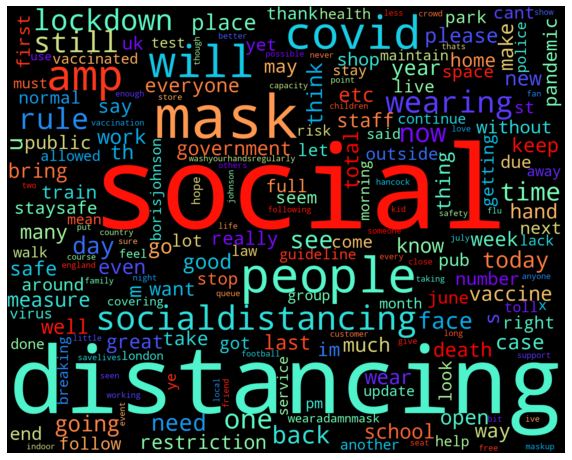

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

wordcloud = WordCloud(width=1500, height=1200, margin=0,
                      colormap='rainbow',
                      #background_color='white',
                      collocations=False).generate(' '.join(total_tokens))

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

### **2. UK Twitter Missing values**

Let us plot the missing values now

In [314]:
def return_missing_values(data_frame):
    
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    
    return missing_values

In [315]:
def plot_missing_values(data_frame):
    
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    
    return plt.show()

In [316]:
return_missing_values(data)

author_description    0.083327
author_location       0.111455
dtype: float64

In [317]:
data.isna().sum()

author_id                0
username                 0
author_followers         0
author_tweets            0
author_description    1022
author_location       1367
text                     0
created_at               0
retweets                 0
replies                  0
likes                    0
quote_count              0
dtype: int64

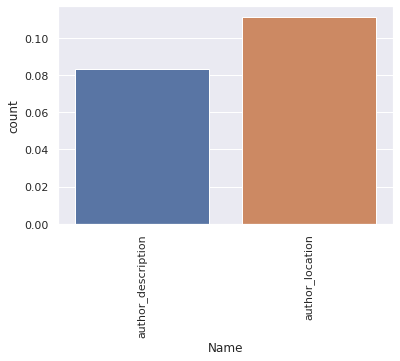

In [318]:
plot_missing_values(data)

### **3.Heat map for missing values**

We can use different types of graphs such as Barplot, Histogram, Heatmap, Scatterplot, Boxplot and many more for visualization of the dataset.

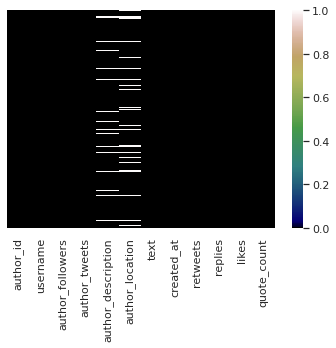

In [319]:
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='gist_earth');

### **4. Bar plot for Unique Values**

Now let us plot the Unique Values

In [320]:
def return_unique_values(data_frame):
    
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    
    return unique_dataframe

In [321]:
unidf = return_unique_values(data)
print(unidf)

              Features  Uniques
0            author_id     8171
1             username     8171
2     author_followers     3195
3        author_tweets     6947
4   author_description     7401
5      author_location     3715
6                 text    12249
7           created_at    12257
8             retweets       67
9              replies       48
10               likes      160
11         quote_count       25


Let us plot the unique value counts for each column in our dataset.

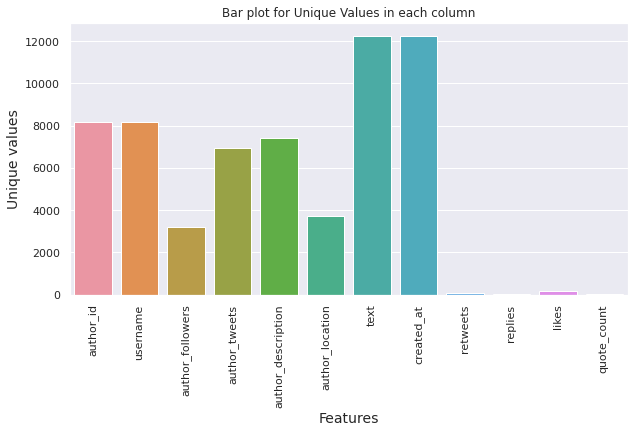

In [322]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'])
sns.set(style='darkgrid')
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### **5. Bar plot for UK Location**

In [323]:
location_count_df = pd.DataFrame(uk_data_df['author_location'].value_counts()[:]).reset_index().rename(columns={'index' : 'Location', 'author_location' : 'Count'})

In [324]:
location_count_df

,Location,Count
0,no_location,1367
1,"London, England",389
2,London,347
3,UK,222
4,"Deanshanger, England",199
...,...,...
3711,"Hornsea, England",1
3712,Scunthorpe / York,1
3713,"Brinsley, Nottingham",1
3714,"Wandsworth, London, UK",1


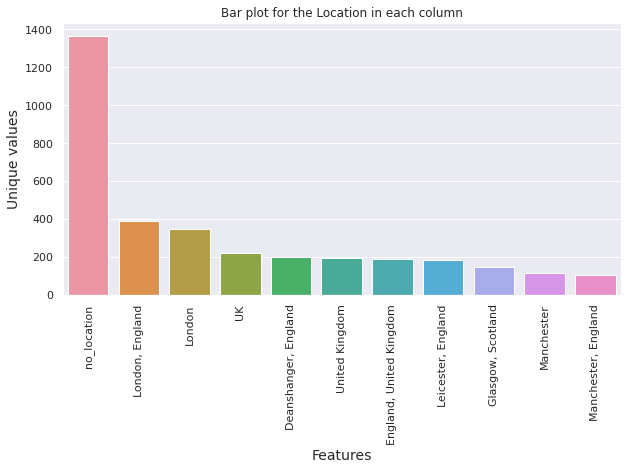

In [325]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=location_count_df['Location'][:11], y=location_count_df['Count'][:11])
plt.title('Bar plot for the Location in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

No let us exclude no location count and get the first higher count location.

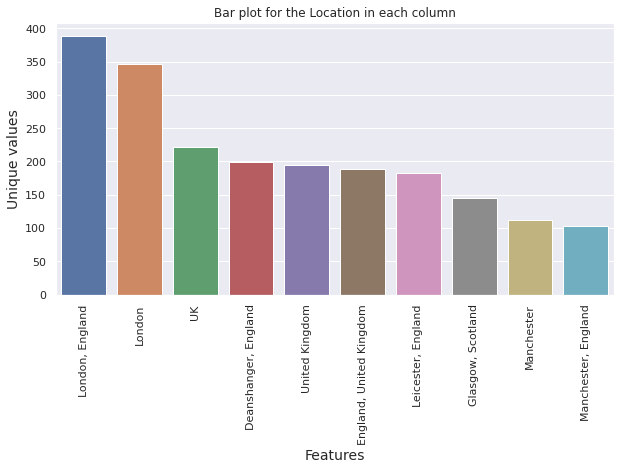

In [326]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=location_count_df['Location'][1:11], y=location_count_df['Count'][1:11])
plt.title('Bar plot for the Location in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### **5. Frequent Users who Tweet about Social Distancing**

In [327]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Social Distancing'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

Now we will visualize the most frequent users who post tweets related to social distancing:

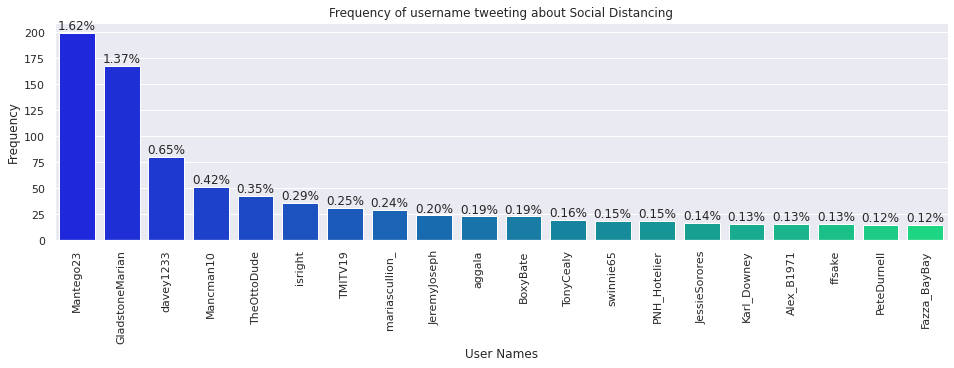

In [328]:
plot_frequency_charts(uk_data_df, 'username', 'User Names','winter')

In [329]:
uk_data_df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count', 'clean_tweets',
       'hastags_count', 'mentions_count', 'extracted_hashtags', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Period', 'Period_id'],
      dtype='object')

### **6. Most Frequent locations from where people tweet about Social Distancing**

Second we will visualize the most frequent locations related to social distancing tweets:

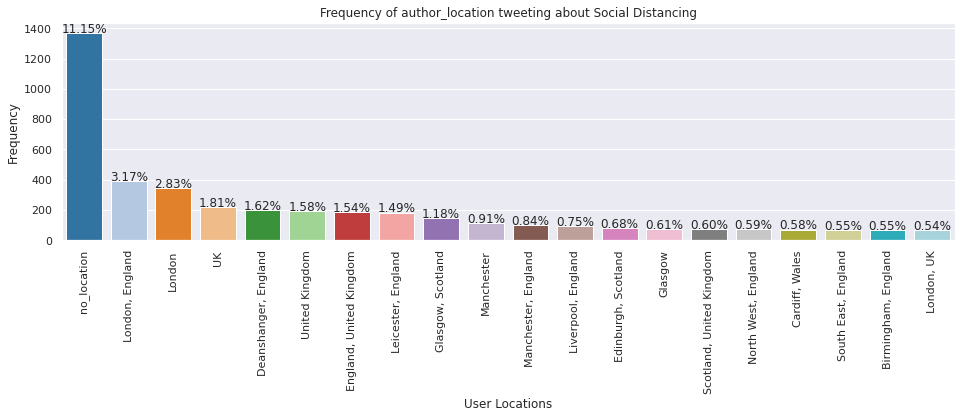

In [330]:
plot_frequency_charts(uk_data_df, 'author_location', 'User Locations', 'tab20')

The most liked for tweeting about social distance 

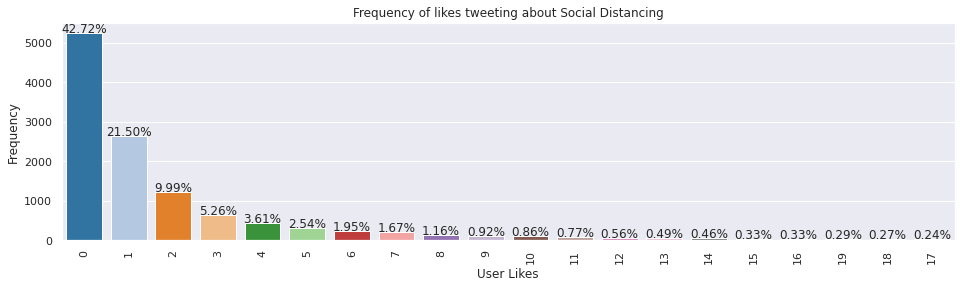

In [331]:
plot_frequency_charts(uk_data_df, 'likes', 'User Likes', 'tab20')

In [332]:
uk_data_df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count', 'clean_tweets',
       'hastags_count', 'mentions_count', 'extracted_hashtags', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Period', 'Period_id'],
      dtype='object')

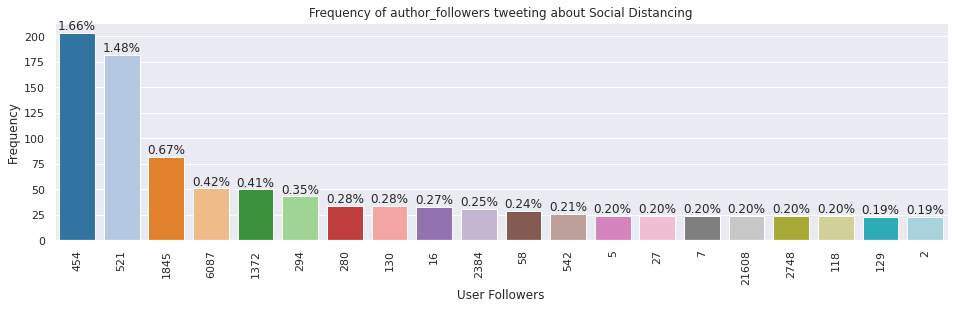

In [333]:
plot_frequency_charts(uk_data_df, 'author_followers', 'User Followers', 'tab20')

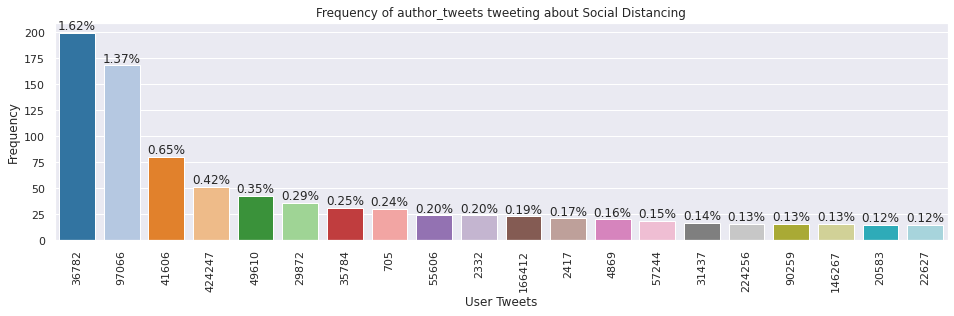

In [334]:
plot_frequency_charts(uk_data_df, 'author_tweets', 'User Tweets', 'tab20')

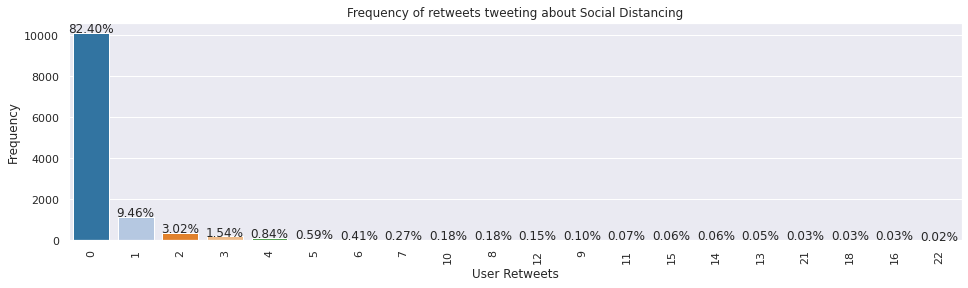

In [335]:
plot_frequency_charts(uk_data_df, 'retweets', 'User Retweets', 'tab20')

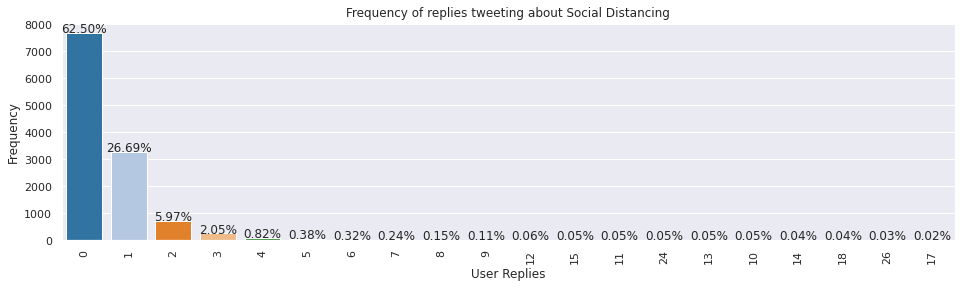

In [336]:
plot_frequency_charts(uk_data_df, 'replies', 'User Replies', 'tab20')

### **7.Top Words of Social Distancing**

Now let us visualize the top words which have been used by most of the people in tweeting about the Social Distancing

To truly comprehend the substance of the tweets that individuals send, we must first grasp the most prevalent sorts of terms utilised in these tweets. To do so, we'll need to generate a Word Cloud comprising the top 50 most often used words in the tweets. The word clouds will be generated based on the location from which the tweets were posted. We'll make a separate word cloud for each site. The screen shots below are from a word cloud of the leading most terms in UK.

Let us first visualize top 30 words used in tweets location wise

In [337]:
def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

In [338]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.author_location==location]
    tweets_from_loc.loc[:, 'clean_tweets'] = tweets_from_loc['clean_tweets'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['clean_tweets'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');

In [339]:
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.author_location==location]
    loc_df.loc[:, 'clean_tweets'] = loc_df['clean_tweets'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

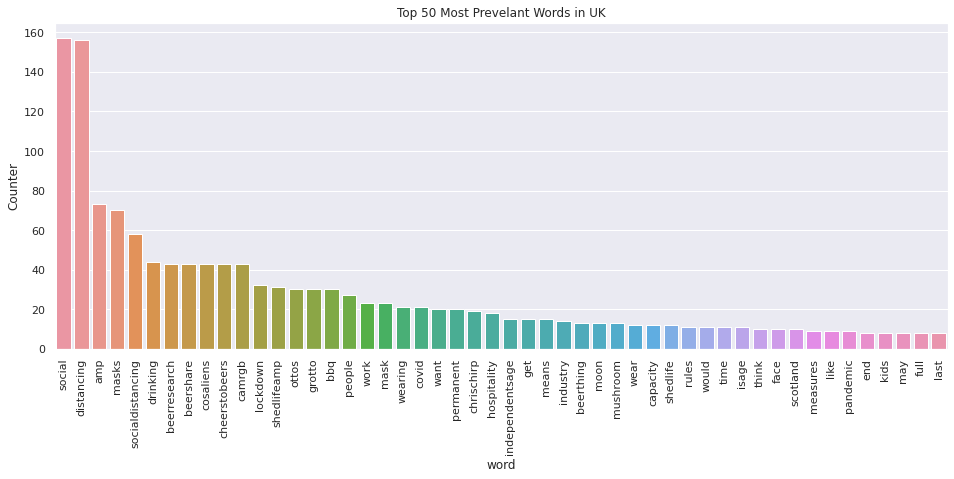

In [340]:
draw_bar_graph_for_text_visualization(uk_data_df, 'UK')

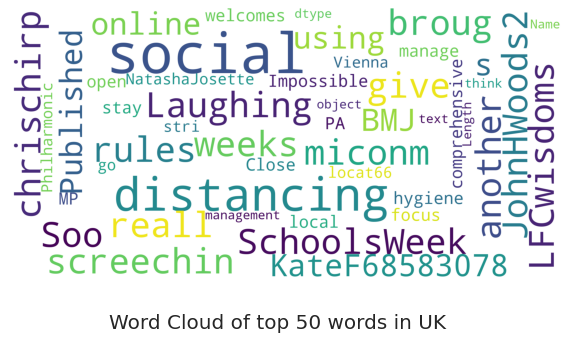

In [341]:
draw_word_cloud(uk_data_df, 'UK', 'Word Cloud of top 50 words in UK')

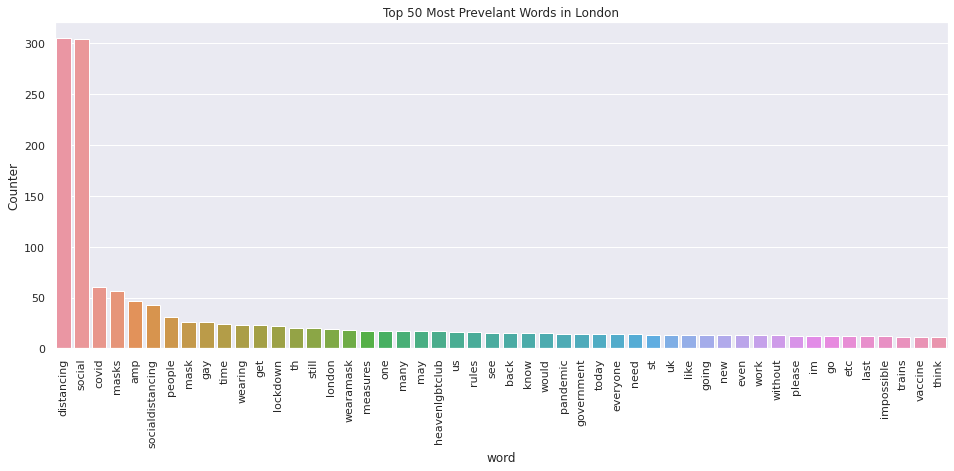

In [342]:
draw_bar_graph_for_text_visualization(uk_data_df, 'London')

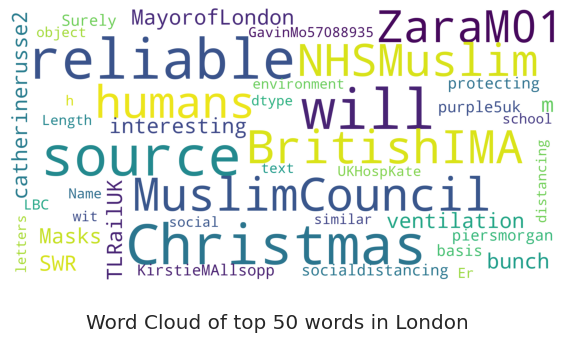

In [343]:
draw_word_cloud(uk_data_df, 'London', 'Word Cloud of top 50 words in London')

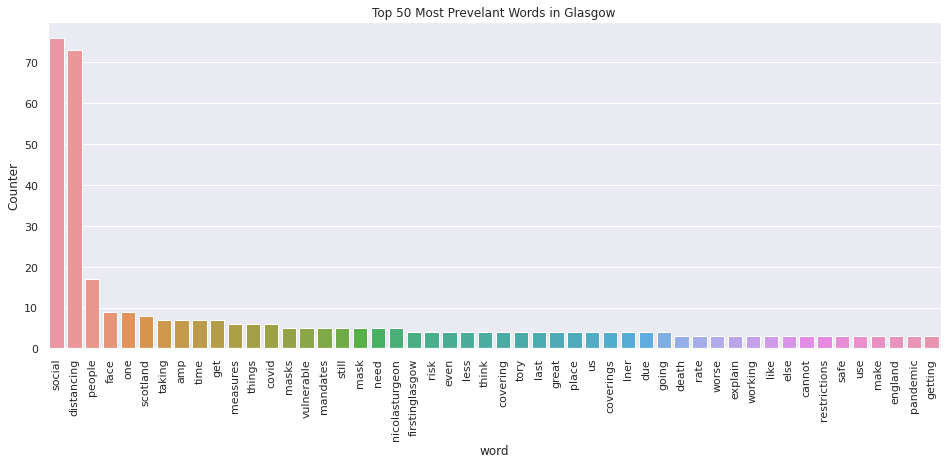

In [344]:
draw_bar_graph_for_text_visualization(uk_data_df, 'Glasgow')

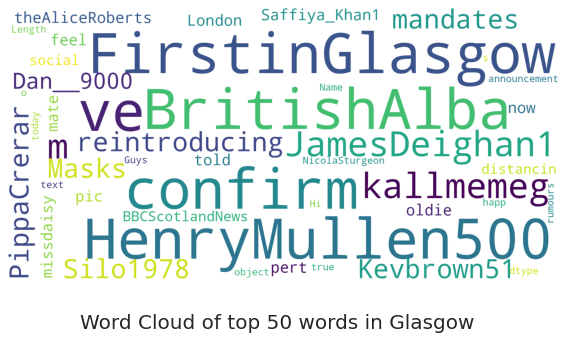

In [345]:
draw_word_cloud(uk_data_df, 'Glasgow', 'Word Cloud of top 50 words in Glasgow')

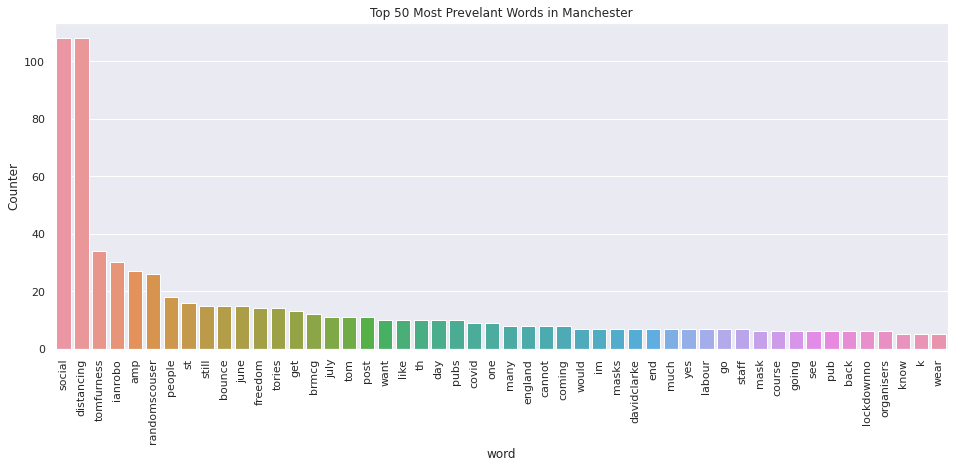

In [346]:
draw_bar_graph_for_text_visualization(uk_data_df, 'Manchester')

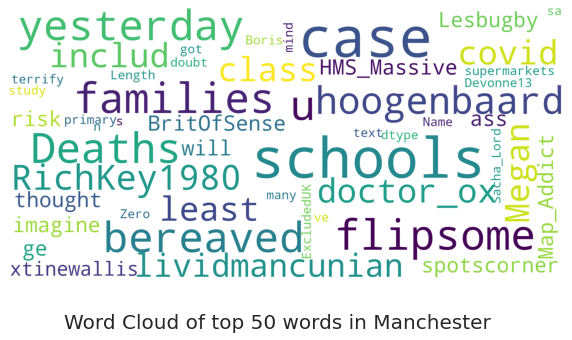

In [347]:
draw_word_cloud(uk_data_df, 'Manchester', 'Word Cloud of top 50 words in Manchester')

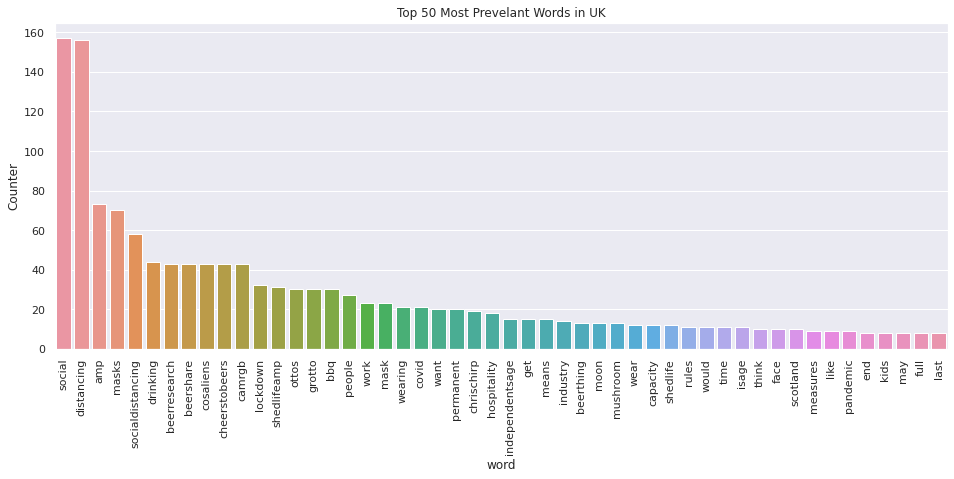

In [348]:
draw_bar_graph_for_text_visualization(uk_data_df, 'UK')

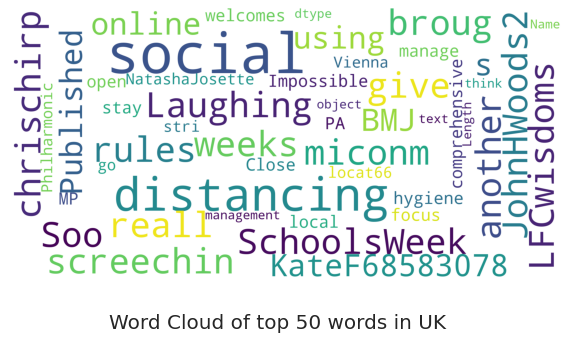

In [349]:
draw_word_cloud(uk_data_df, 'UK', 'Word Cloud of top 50 words in UK')

Similarly, we can create a word cloud for each location mentioned in the dataset.

Thus, by employing EDA techniques, we may gain a thorough understanding of the dataset, extract meaningful information from it, and determine whether or not the dataset has any flaws.

## References

1. Word Clouds - COVID 19 Tweets
https://www.kaggle.com/ukveteran/word-clouds-covid-19-tweets-jma
2. COVID19 Tweets
https://www.kaggle.com/gpreda/covid19-tweets
3. 🦠COVID-19: Sentiment Analysis & Social Networks
https://www.kaggle.com/andradaolteanu/covid-19-sentiment-analysis-social-networks

<img src="https://i.imgur.com/VCzUM0V.png">